## 精準行銷 - 透過共現圖分析電訪對話資料

In [2]:
import pandas as pd
import numpy as np
import jieba.analyse

In [3]:
stopWords = []
with open('data/stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [4]:
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [5]:
with open('data/ner.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\OWNER\AppData\Local\Temp\jieba.cache
Loading model cost 0.847 seconds.
Prefix dict has been built successfully.


In [6]:
df_terms = pd.read_csv('data/customer.csv')

In [7]:
df_terms.head()

,Unnamed: 0,類別,Unique ID,資料日期,客戶事件描述
0,0,Call Out,AA2765,20180102 141000,[ECP] 去電確認開戶文件 客戶說後來去買美元保單就不開戶了
1,1,Call Out,AA3910,20180102 144300,[ECP]不方說 IPO MAIL
2,2,Call Out,AA3167,20180102 154500,[ECP] IPO 忙 先MAIL
3,3,Call Out,AA2355,20180102 194359,家庭戶 媽媽說女兒不開了，因為打工收入不穩定
4,4,Call Out,AA2778,20180103 111132,推Q1


In [8]:
error_lst = []
terms=[]
for i in range(len(df_terms['客戶事件描述'])):
    try:
        for j in list(jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)):
            if j not in stopWords:
                terms.append(j)
    except:
        error_lst.append([i, df_terms['客戶事件描述'][i]])

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import jieba
import codecs
import jieba.posseg as pseg

In [10]:
names = {}          
relationships = {}  
lineNames = []  
for i in range(len(df_terms['客戶事件描述'])):
    try:
        poss = jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:    
                relationships[w] = {}            
    except:
        pass

In [11]:
relationships

{'EC': {},
 'P': {},
 '電確認': {},
 '開戶': {},
 '文件': {},
 '客戶說': {},
 '後來': {},
 '買美元保單': {},
 '不方': {},
 'IPO': {},
 'MAIL': {},
 '忙': {},
 '家庭戶': {},
 '媽媽': {},
 '女兒': {},
 '不開': {},
 '打工': {},
 '收入': {},
 '穩定': {},
 '推': {},
 'Q1': {},
 '兒子': {},
 '未成年': {},
 '不願辦': {},
 '網路': {},
 '單筆': {},
 '買亞': {},
 '太': {},
 '複': {},
 '合債': {},
 '林': {},
 '屏': {},
 '216022': {},
 '可能': {},
 '這戶': {},
 '下單': {},
 '嫌': {},
 '麻煩': {},
 '台幣': {},
 '瑞興': {},
 '轉介': {},
 '208': {},
 '想': {},
 '買': {},
 '基金': {},
 '小姐': {},
 'nnl': {},
 '新興市': {},
 '場債': {},
 '美元': {},
 '買回': {},
 '積': {},
 '單': {},
 '忍波動': {},
 'Idris轉介': {},
 '客戶': {},
 '來電說': {},
 '看到': {},
 '年': {},
 '美金': {},
 '先寄': {},
 '外': {},
 '幣帳號': {},
 '台北富邦': {},
 '要用': {},
 '名字': {},
 '開': {},
 '四年': {},
 '期': {},
 '寄書面': {},
 '通訊': {},
 'Stock': {},
 'Q': {},
 '年期': {},
 '10': {},
 '22': {},
 '進線詢問': {},
 'PASS': {},
 'M': {},
 'ipo': {},
 '人民': {},
 '幣': {},
 '參考': {},
 '生日券': {},
 '俄': {},
 '印度': {},
 '周O幸': {},
 '小孩': {},
 '來電問': {},
 

In [12]:
term_dic = dict()
for sentence in lineNames:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [13]:
for i in range(len(lineNames)):
    for term1 in term_dic:
        num = 0
        for term2 in lineNames[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][df_terms['客戶事件描述'][i]] = num

In [14]:
TDM = pd.DataFrame.from_dict(term_dic)
TDM.head()

,EC,P,電確認,開戶,文件,客戶說,後來,買美元保單,不方,IPO,...,老師,NTD20M,全國性,附給,不定期,併,房貸,放長,已下,50000
[ECP] 去電確認開戶文件 客戶說後來去買美元保單就不開戶了,1,1,1,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]不方說 IPO MAIL,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
[ECP] IPO 忙 先MAIL,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
家庭戶 媽媽說女兒不開了，因為打工收入不穩定,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
推Q1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cooccurrence Matrix

In [15]:
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_terms['客戶事件描述'])):
    try:
        poss = jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:
                names[w] = 0
                relationships[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 25]

In [16]:
co_occur_by_records

[['EC', 'P', 482],
 ['EC', '開戶', 65],
 ['EC', '客戶說', 27],
 ['EC', '買', 26],
 ['EC', '推', 55],
 ['EC', '客戶', 47],
 ['EC', '寄回', 40],
 ['EC', '收到', 52],
 ['EC', '追', 104],
 ['EC', '蹤', 99],
 ['EC', '看看', 28],
 ['EC', '手機', 30],
 ['P', 'EC', 482],
 ['P', '開戶', 55],
 ['P', '客戶', 41],
 ['P', '寄回', 32],
 ['P', '收到', 44],
 ['P', '追', 64],
 ['P', '蹤', 59],
 ['P', '推', 41],
 ['P', '看看', 27],
 ['P', '手機', 29],
 ['開戶', 'EC', 65],
 ['開戶', 'P', 55],
 ['開戶', '文件', 28],
 ['開戶', '客戶', 27],
 ['開戶', '寄', 34],
 ['文件', '開戶', 28],
 ['客戶說', 'EC', 27],
 ['推', 'Q1', 30],
 ['推', 'EC', 55],
 ['推', 'P', 41],
 ['Q1', '推', 30],
 ['買', 'EC', 26],
 ['單', '電子', 78],
 ['單', '報訂', 78],
 ['單', '閱名', 78],
 ['單', '寄送', 74],
 ['單', '退休', 73],
 ['單', '專刊', 78],
 ['客戶', '開戶', 27],
 ['客戶', 'EC', 47],
 ['客戶', 'P', 41],
 ['人民', '幣', 32],
 ['幣', '人民', 32],
 ['寄回', 'EC', 40],
 ['寄回', 'P', 32],
 ['寄', '開戶', 34],
 ['寄', '專刊', 26],
 ['收到', 'EC', 52],
 ['收到', 'P', 44],
 ['名單', '分配', 65],
 ['追', 'EC', 104],
 ['追', '蹤', 75],
 ['追', 'P'

In [17]:
type(co_occur_by_records)
co_occur_by_records

[['EC', 'P', 482],
 ['EC', '開戶', 65],
 ['EC', '客戶說', 27],
 ['EC', '買', 26],
 ['EC', '推', 55],
 ['EC', '客戶', 47],
 ['EC', '寄回', 40],
 ['EC', '收到', 52],
 ['EC', '追', 104],
 ['EC', '蹤', 99],
 ['EC', '看看', 28],
 ['EC', '手機', 30],
 ['P', 'EC', 482],
 ['P', '開戶', 55],
 ['P', '客戶', 41],
 ['P', '寄回', 32],
 ['P', '收到', 44],
 ['P', '追', 64],
 ['P', '蹤', 59],
 ['P', '推', 41],
 ['P', '看看', 27],
 ['P', '手機', 29],
 ['開戶', 'EC', 65],
 ['開戶', 'P', 55],
 ['開戶', '文件', 28],
 ['開戶', '客戶', 27],
 ['開戶', '寄', 34],
 ['文件', '開戶', 28],
 ['客戶說', 'EC', 27],
 ['推', 'Q1', 30],
 ['推', 'EC', 55],
 ['推', 'P', 41],
 ['Q1', '推', 30],
 ['買', 'EC', 26],
 ['單', '電子', 78],
 ['單', '報訂', 78],
 ['單', '閱名', 78],
 ['單', '寄送', 74],
 ['單', '退休', 73],
 ['單', '專刊', 78],
 ['客戶', '開戶', 27],
 ['客戶', 'EC', 47],
 ['客戶', 'P', 41],
 ['人民', '幣', 32],
 ['幣', '人民', 32],
 ['寄回', 'EC', 40],
 ['寄回', 'P', 32],
 ['寄', '開戶', 34],
 ['寄', '專刊', 26],
 ['收到', 'EC', 52],
 ['收到', 'P', 44],
 ['名單', '分配', 65],
 ['追', 'EC', 104],
 ['追', '蹤', 75],
 ['追', 'P'

In [18]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,EC,P,單,寄,退休,寄送,閱名,開戶,專刊,推,...,看看,手機,蹤,分配,名單,ec,客戶說,文件,收到,買
EC,NaN,482.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,55.0,...,28.0,30.0,99.0,NaN,NaN,NaN,27.0,NaN,52.0,26.0
P,482.0,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,41.0,...,27.0,29.0,59.0,NaN,NaN,NaN,NaN,NaN,44.0,NaN
單,NaN,NaN,NaN,NaN,73.0,74.0,78.0,NaN,78.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
寄,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
退休,NaN,NaN,73.0,NaN,NaN,74.0,73.0,NaN,88.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
type(co_occurrence_matrix_by_records)

pandas.core.frame.DataFrame

In [26]:
co_occur_by_records_sig

[['看看', 'EC', 0.35227888521282347],
 ['推', 'P', 0.40117376762686696],
 ['專刊', '單', 0.5480347130574271],
 ['開戶', '寄', 0.37453159858143703],
 ['EC', 'P', 0.9987345199987651],
 ['電子', '退休', 0.5281093847803544],
 ['電子', '寄送', 0.5321036802434842],
 ['寄送', '閱名', 0.5321036802434842],
 ['寄', '開戶', 0.37453159858143703],
 ['手機', 'EC', 0.3596309549028345],
 ['寄送', '專刊', 0.5520034236983313],
 ['EC', '推', 0.4560931094933743],
 ['專刊', '閱名', 0.5480347130574271],
 ['寄送', '單', 0.5321036802434842],
 ['幣', '人民', 0.3670495125571202],
 ['收到', 'EC', 0.444186739104755],
 ['EC', '開戶', 0.49606832270013473],
 ['推', 'Q1', 0.3596309549028345],
 ['退休', '電子', 0.5281093847803544],
 ['手機', 'P', 0.35594642875522214],
 ['EC', '追', 0.6478618302152995],
 ['追', 'P', 0.4920600575316979],
 ['P', '寄回', 0.3670495125571202],
 ['客戶說', 'EC', 0.34862867536004477],
 ['電子', '專刊', 0.5480347130574271],
 ['推', 'EC', 0.4560931094933743],
 ['P', '客戶', 0.40117376762686696],
 ['寄', '專刊', 0.344996142535114],
 ['退休', '報訂', 0.528109384780354

In [20]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

In [21]:
co_occur_by_records

[['看看', 'EC', 28],
 ['推', 'P', 41],
 ['專刊', '單', 78],
 ['開戶', '寄', 34],
 ['EC', 'P', 482],
 ['電子', '退休', 73],
 ['電子', '寄送', 74],
 ['寄送', '閱名', 74],
 ['寄', '開戶', 34],
 ['手機', 'EC', 30],
 ['寄送', '專刊', 79],
 ['EC', '推', 55],
 ['專刊', '閱名', 78],
 ['寄送', '單', 74],
 ['幣', '人民', 32],
 ['收到', 'EC', 52],
 ['EC', '開戶', 65],
 ['推', 'Q1', 30],
 ['退休', '電子', 73],
 ['手機', 'P', 29],
 ['EC', '追', 104],
 ['追', 'P', 64],
 ['P', '寄回', 32],
 ['客戶說', 'EC', 27],
 ['電子', '專刊', 78],
 ['推', 'EC', 55],
 ['P', '客戶', 41],
 ['寄', '專刊', 26],
 ['退休', '報訂', 73],
 ['P', '開戶', 55],
 ['報訂', '退休', 73],
 ['人民', '幣', 32],
 ['開戶', '客戶', 27],
 ['EC', '看看', 28],
 ['閱名', '單', 78],
 ['P', '追', 64],
 ['P', '手機', 29],
 ['EC', '手機', 30],
 ['報訂', '電子', 78],
 ['P', '推', 41],
 ['P', '蹤', 59],
 ['單', '閱名', 78],
 ['報訂', '寄送', 74],
 ['單', '電子', 78],
 ['買', 'EC', 26],
 ['單', '報訂', 78],
 ['專刊', '寄', 26],
 ['閱名', '寄送', 74],
 ['退休', '單', 73],
 ['P', 'EC', 482],
 ['報訂', '閱名', 78],
 ['報訂', '專刊', 78],
 ['客戶', 'EC', 47],
 ['電子', '單', 78],
 ['EC'

In [22]:
count_by_records

[28,
 41,
 78,
 34,
 482,
 73,
 74,
 74,
 34,
 30,
 79,
 55,
 78,
 74,
 32,
 52,
 65,
 30,
 73,
 29,
 104,
 64,
 32,
 27,
 78,
 55,
 41,
 26,
 73,
 55,
 73,
 32,
 27,
 28,
 78,
 64,
 29,
 30,
 78,
 41,
 59,
 78,
 74,
 78,
 26,
 78,
 26,
 74,
 73,
 482,
 78,
 78,
 47,
 78,
 99,
 27,
 74,
 74,
 73,
 40,
 55,
 78,
 30,
 65,
 78,
 28,
 59,
 65,
 65,
 79,
 78,
 29,
 29,
 74,
 27,
 32,
 78,
 40,
 29,
 47,
 78,
 41,
 27,
 104,
 28,
 88,
 29,
 73,
 99,
 74,
 74,
 75,
 78,
 73,
 44,
 27,
 75,
 52,
 78,
 88,
 26,
 78,
 44,
 78]

In [27]:
co_occur_by_records_sig
type(co_occur_by_records_sig)


list

In [24]:
import matplotlib
print(matplotlib.__file__)

c:\Python310\lib\site-packages\matplotlib\__init__.py


TypeError: draw_networkx_edges() got an unexpected keyword argument 'node_color'

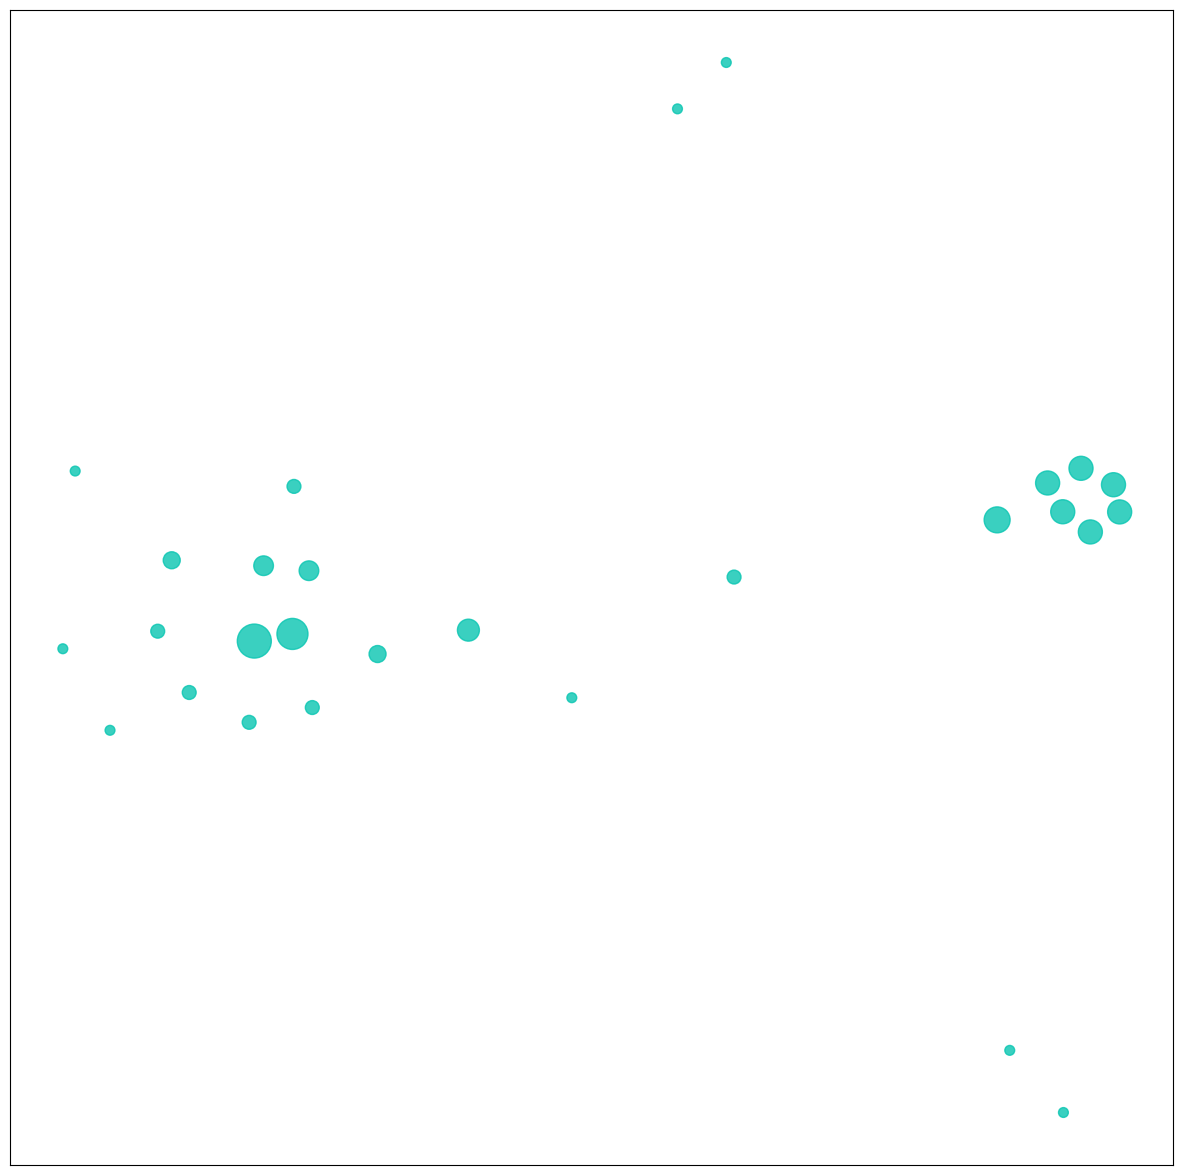

In [28]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['DFKai-SB']   
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每筆通聯紀錄為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
plt.show()

## 以每個客戶為基準，再做一次

In [ ]:
df_event = pd.DataFrame()
for i in df_terms['Unique ID'].value_counts().index:
    for j in df_terms[df_terms['Unique ID'] == i].reset_index().index :
        df_event.at[i, j] = df_terms[df_terms['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_by_id = pd.DataFrame()
df_by_id['客戶事件描述'] = df_event[0]
df_by_id.index = df_event.index
for i in df_event.index:
    df_by_id.at[i, '客戶事件描述']  = ' '.join([str(j) for j in df_event.loc[i] if not pd.isna(j)])

In [ ]:
df_by_id.head()

,客戶事件描述
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5...
AA2986,"現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中..."
AA1538,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫 208 娘298803廖○霞 去電娘29...
AA6076,"[ECP]境外ES被退:無此使用者,客戶的兒子說少打tw,寄表單修改 [ECP]想要買回，要..."
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行 [ECP]follow 名單,有..."


In [ ]:
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_by_id['客戶事件描述'])):
    try:
        poss = jieba.cut(df_by_id['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None:
                names[w] = 0
            relationships[w] = {}
            names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_unicodes = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 50]

In [ ]:
np.random.shuffle(co_occur_by_unicodes)
temp_matrix = pd.DataFrame()
for i in co_occur_by_unicodes:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_unicodes = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_unicodes.at[i, j] = temp_matrix.at[i, j]

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_unicodes = [i[2] for i in co_occur_by_unicodes]
co_occur_by_unicodes_sig = []
for i in co_occur_by_unicodes:
    co_occur_by_unicodes_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_unicodes))/np.std(count_by_unicodes))])

In [29]:
plt.figure(figsize=(15,15))
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_unicodes_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8, node_size=[val*50 for (node, val) in g.degree()], node_color='#b108c5')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2) 
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每個客戶為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("image/用詞共線圖_以每個客戶為一句.png", dpi=100)
plt.show()

NameError: name 'co_occur_by_unicodes_sig' is not defined

<Figure size 1500x1500 with 0 Axes>